<a href="https://colab.research.google.com/github/kajalsaini611/house-prediction-Task-01/blob/main/H21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Sample Dataframe

In [13]:
import pandas as pd
df = pd.read_csv('/content/House_Price_Prediction_Dataset[2].csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


Define the features(independent variables) and the target(dependent variable)

In [15]:
X = df[['Area', 'Bedrooms', 'Bathrooms']]
y = df['Price']



Split the dataset into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Create LinearRegression Model

In [17]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()

Train the model using the training data

In [18]:
model.fit(X_train,y_train)

LinearRegression()

Make predictions on the test set

In [19]:
y_pred=model.predict(X_test)

Model evaluation

In [20]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

Plotting for Bedrooms

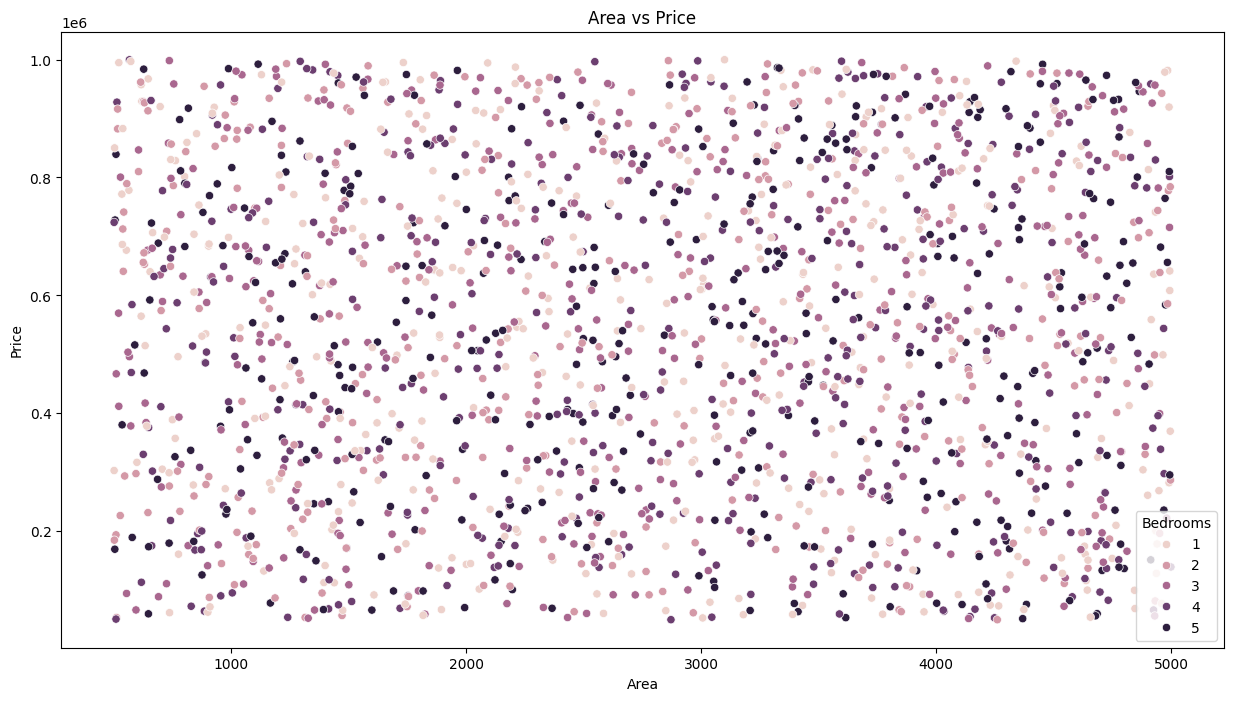

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Area', y='Price', data=df, color='blue',hue='Bedrooms')
plt.title('Area vs Price')
plt.show()

Plotting for Bathrooms

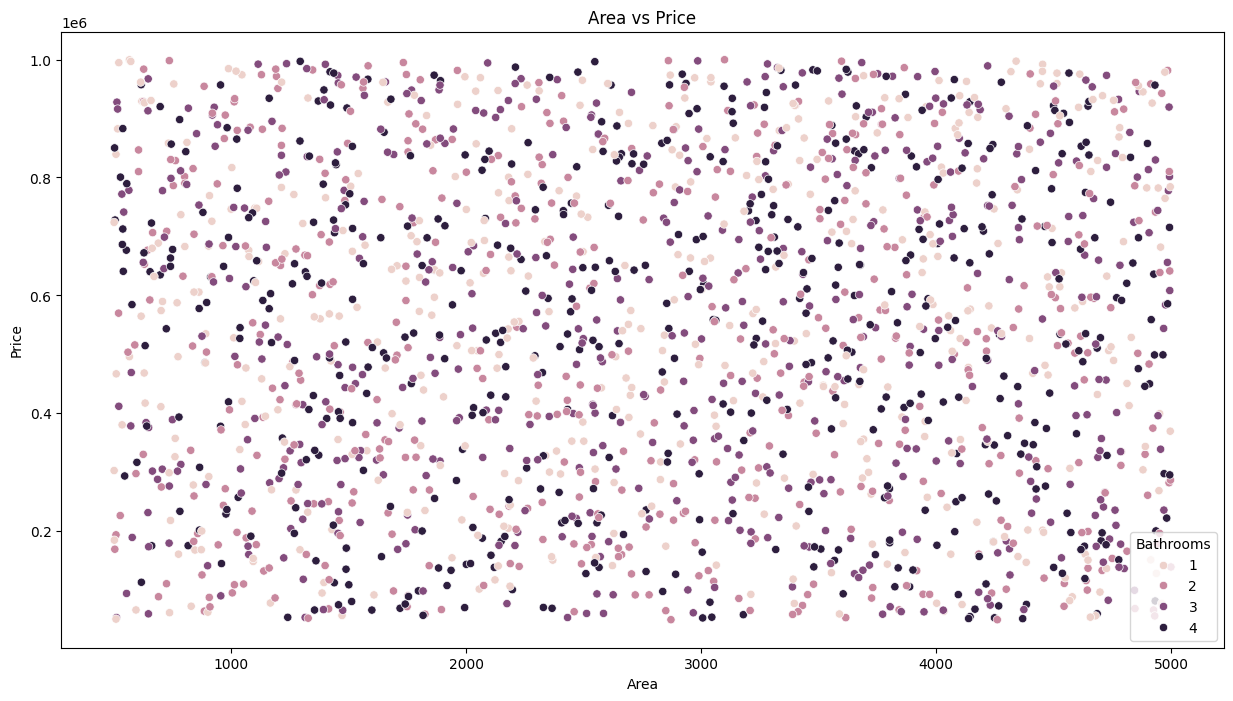

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.scatterplot(x='Area', y='Price', data=df, color='blue',hue='Bathrooms')
plt.title('Area vs Price')
plt.show()

Normalize the data

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Build the model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [25]:
model.compile(optimizer='adam', loss='mse')


Train the model

In [26]:


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=4, validation_split=0.2, verbose=1)


Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 374123823104.0000 - val_loss: 349180297216.0000
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 359338901504.0000 - val_loss: 347693219840.0000
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 367229698048.0000 - val_loss: 343791632384.0000
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 351147130880.0000 - val_loss: 336704962560.0000
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 353037123584.0000 - val_loss: 326003523584.0000
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 342580887552.0000 - val_loss: 311577214976.0000
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 331905531904.0000 - val_loss: 293760860160.0000
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 315829977088.0000 - val_loss: 272846323712.0000
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 283562409984.0000 - val_loss: 249679495168.0000
Epoch 10/100
320/32

Evaluate the model on the test set

In [27]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Display the results

In [28]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 78355765736.54436
R-squared: -0.007158756256103516


Display the model coefficients and intercepts

In [29]:

first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]

print('Weights of the first layer:', first_layer_weights)
print('Biases of the first layer:', first_layer_biases)

output_layer_weights = model.layers[-1].get_weights()[0]
output_layer_biases  = model.layers[-1].get_weights()[1]

print('Weights of the Output layer:', output_layer_weights)
print('Biases of the Output layer:', output_layer_biases)

Weights of the first layer: [[ 1.3765024e+00 -4.7154516e-01 -3.8459539e-01 -9.7039020e-01
  -6.1241019e-01  8.3113766e-01  2.4435362e-01  2.0040941e+00
   1.9757543e+00 -2.0453613e-01 -5.5360669e-01  1.4350544e+00
   6.1101562e-01  3.0123385e-02 -1.0446296e+00 -1.8746060e-01
   3.3385184e-01  7.8951049e-01  4.5897973e-01 -4.1674724e-01
  -4.5168352e-01  1.4949677e+00 -1.2196034e+00 -3.0851778e-01
   1.5561630e+00 -1.5073959e+00  7.6472425e-01  1.5428506e+00
  -1.0655550e+00  1.6722809e+00  1.9310187e+00  1.1289769e+00
   2.2963643e+00 -2.7006721e-01 -7.1610701e-01 -9.7850358e-01
  -2.2288188e-01 -9.6384841e-01 -7.4637146e-03 -7.1707171e-01
  -6.9558001e-01 -2.2571920e-01  7.5137317e-01 -3.2714391e-01
   9.1717696e-01 -7.2702348e-01  1.5976101e+00 -4.7739786e-01
  -3.0736628e-01  1.4109117e+00 -1.1527977e+00 -6.9093257e-01
  -8.4750348e-01 -8.5621715e-01 -1.0718620e+00 -1.1481071e+00
  -3.3836120e-01 -5.0316477e-01  2.1699281e-01 -7.4749476e-01
   6.6239566e-02  2.3448814e-01  1.1418399

Sample predictions for a new house

In [30]:
new_house = np.array([[2000, 3, 2]])  # 2000 sqft, 3 bedrooms, 2 bathrooms
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)
print("Predicted Price for new house:", predicted_price[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Price for new house: [540860.1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
